# 1.特征选择方法
## 1.1 特征选择的作用
1. 减少特征数量，降维，使模型的泛化能力更强，减少过拟合
2. 增强对特征和特征值之间的理解
## 1.2特征选择分类---根据特征选择的形式
### 1.2.1过滤法Filter
####  1.原理
1. 按照特征的发散性(方差大小)或者相关性对各个特征进行评分,设定阈值或待选择阈值的个数,选择特征
#### 2.常见方法
1. 方差过滤
2. 单变量特征选择
> 1. 卡方检验
> 2. 相关系数
> 3. 互信息和最大信息系数(MIC)
> 4. 距离相关系数
3. 
### 1.2.2.包装法Wrapper
#### 1. 原理
1. 根据目标函数(通常为预测效果评分),每次选择若干特征或者排除若干特征
1. **可以将特征子集的选择看做是一个搜索寻优的问题,生成不同的组合,对组合进行评价,再与其他的组合进行比较.**
2. 可以看做是一个优化问题
#### 2.常见方法
1. 递归特征消除法
2. 
### 1.2.3.嵌入法Embedded
1. 原理:先**使用某些机器学习的算法和模型进行训练,得到各个特征的权值系数,根据系数从大到小选择特征,类似Filter,但是是经过训练来确定特征的优劣---在确定模型的过程中,挑选出哪些对模型的训练有重要意义的属性**
2. 常见方法
> 1. 基于惩罚项的特征选择法
> 2. 基于树模型的特征选择法

# 2.Filter法
## 2.1.过滤方差小的特征 
### 1.原理
1. 数据方差的大小代表着含有的信息量,方差过小,则代表着特征信息量过小,可以删除
### 2.应用场景
1. 优点:简单但是只能筛选出小部分特征,实际中很多特征的方差都不小，**所以常用于特征选择的预选择**
### 3.实现

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
X = np.array([[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]])
print(X)
sel = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
sel.fit_transform(X)

[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## 2.2 单变量特征选择

### 2.2.1 卡方检验
1. 使用范围:定性自变量对定性因变量的相关性

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 选择k个最好的特征,返回选择特征后的数据
# SelectKBest(chi2,k=2).fit_transform(irisdata,iris.target)
X = np.array([[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]])
y = np.array([0,1,1,0,1,1]).reshape(6,1)
SelectKBest(chi2,k=2).fit_transform(X,y)

array([[0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 1]])

### 2.2.2 Pearson相关系数
1. 使用范围:
> 1. 线性关系
> 2. 连续变量之间.
> 3. 符合正态分布
2. 缺点:
> 1. 即使两个变量有一一对应关系,但关系如果是非线性的,那么Pearson相关性可能也为0

In [4]:
# 1. 方法1
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.normal(0, 1, size)
# pearsonr(x, y)的输入为特征矩阵和目标向量
# np.random.normal(0, 1, 100) 创建100个均值为0，方差为1的高斯随机数
print("Lower noise", pearsonr(x, x + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(x, x + np.random.normal(0, 10, size)))
# 输出为二元组(sorce, p-value)的数组

Lower noise (0.7182483686213841, 7.32401731299835e-49)
Higher noise (0.057964292079338155, 0.3170099388532475)


In [5]:
# 2.方法2
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X = pd.DataFrame(X,columns = iris.feature_names)
y = pd.DataFrame(y,columns = ["target"])
data = pd.concat([X,y],axis = 1)
data.head()
# 计算相关性
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


### 2.2.3 互信息和最大信息系数(MIC)
1. 互信息
> 1. 评价定性自变量和定性因变量的相关性
> 2. 缺点:直接用于特征选择不太方便,①它不属于度量方式,也没办法归一化,在不同数据上的结果上无法做比较 
> 3. ②对连续变量计算不方便,而且对离散化很敏感
2. 最大信息系数
> 1. 克服了上面的两个缺点,首先寻找一种最优的离散化方式,然后把互信息值转换成一种度量方式,取值区间在[0,1]
3. MIC应用场景:定性和定量之间都可以

In [6]:
from sklearn.feature_selection import SelectKBest
from minepy import MINE
# MINE的设计不是函数式,定义mic方法将其函数式,返回一个二元组,二元组的第二项设置为固定的p值0.5
def mis(x,y):
    m = MINE()
    m.compute_score(x,y)
    return (m.mic(),0.5)
# 选择k个最好的特征,返回特征选择后的数据
# SelectKBest(lambda X,Y:np.array(np.map(lambda x :mic(x,Y),X.T)).T,k=2).fit_transform(iris.data,iris.target)

In [7]:
from minepy import MINE
m = MINE()
x = np.random.uniform(-1,1,10000)
m.compute_score(x,x**2)
print(m.mic())

1.0000000000000009


### 2.2.4 距离相关系数
1. 距离相关系数为了克服皮尔逊相关系数的缺点:皮尔逊相关系数即使为0,也不能断定这两个变量之间是独立的
2. 皮尔逊相关系数优点:不可替代性
> 1. 皮尔逊相关系数计算速度快,在大规模处理数据时非常重要
> 2. 皮尔逊相关系数在[-1,1],而MIC和距离相关系数在[0,1],这让皮尔逊相关系数能表达更丰富的关系.

In [ ]:
import numpy as np
def dist(x, y):
    #1d only
    return np.abs(x[:, None] - y)
def d_n(x):
    d = dist(x, x)
    dn = d - d.mean(0) - d.mean(1)[:,None] + d.mean()
    return dn
def dcov_all(x, y):
    dnx = d_n(x)
    dny = d_n(y)
    
    denom = np.product(dnx.shape)
    dc = (dnx * dny).sum() / denom
    dvx = (dnx**2).sum() / denom
    dvy = (dny**2).sum() / denom
    dr = dc / (np.sqrt(dvx) * np.sqrt(dvy))
    return dc, dr, dvx, dvy

import matplotlib.pyplot as plt
fig = plt.figure()
for case in range(1,5):
    np.random.seed(9854673)
    x = np.linspace(-1,1, 501)
    if case == 1:
        y = - x**2 + 0.2 * np.random.rand(len(x))
    elif case == 2:
        y = np.cos(x*2*np.pi) + 0.1 * np.random.rand(len(x))
    elif case == 3:
        x = np.sin(x*2*np.pi) + 0.0 * np.random.rand(len(x))  #circle
    elif case == 4:
        x = np.sin(x*1.5*np.pi) + 0.1 * np.random.rand(len(x))  #bretzel
    dc, dr, dvx, dvy = dcov_all(x, y)
    print dc, dr, dvx, dvy
    
    ax = fig.add_subplot(2,2, case)
    #ax.set_xlim(-1, 1)
    ax.plot(x, y, '.')
    yl = ax.get_ylim()
    ax.text(-0.95, yl[0] + 0.9 * np.diff(yl), 'dr=%4.2f' % dr)

plt.show()

# 3.Wrapper-包装法
1. 思想:将特征子集的选择看作是一个搜索寻优问题，生成不同的组合，对组合进行评价，再与其他的组合进行比较。

## 3.1递归特征消除法

In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [12]:
# 递归特征消除法,返回特征选择后的数据
# 参数estimator,为基模型
# 参数n_features_to_select 为特征选择的个数
from sklearn.datasets import load_iris
iris = load_iris()
RFE(estimator = LogisticRegression(),n_features_to_select=2).fit_transform(iris.data,iris.target)

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.1],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.1, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

In [15]:
# 例子
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
iris = load_iris()
x,y = iris.data,iris.target

svc = SVC(kernel="linear",C =1)
rfe = RFE(estimator=svc,n_features_to_select=2,step=1)
rfe.fit(x,y)
ranking = rfe.ranking_
print(ranking) # [3 2 1 1],说明第三维度特征和第四维度特征排名前2

# 采用逻辑回归
ref2 = RFE(estimator=LogisticRegression(), n_features_to_select=2).fit(iris.data, iris.target)
print(ref2.ranking_)
# [3 1 2 1]  这里则选择认为第二维和第四维特征重要

[3 2 1 1]
[3 1 2 1]


# 4. Embedded-嵌入法
1. 思想:使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。
2. 也就是:在确定模型的过程中，挑选出那些对模型的训练有重要意义的属性。

## 4.1 基于惩罚项的特征选择

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [19]:
# 1. 待L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l1",C=0.1)).fit_transform(iris.data,iris.target)

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [21]:
# 2.支持向量机的L1惩罚项的特征选择
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X,y = iris.data,iris.target
lsvc = LinearSVC(C=0.01,penalty="l1",dual=False).fit(X,y)
model = SelectFromModel(lsvc,prefit=True)
X_new = model.transform(X)
X_new[:3,:]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3]])

1. L1惩罚项降维的原理在于保留多个对目标值具有同等相关性的特征中的一个，所以没选到的特征不代表不重要。故，可结合L2惩罚项来优化。
2. 具体操作为：若一个特征在L1中的权值为1，选择在L2中权值差别不大且在L1中权值为0的特征构成同类集合，将这一集合中的特征平分L1中的权值，故需要构建一个新的逻辑回归模型

In [23]:
# 3.
from sklearn.linear_model import LogisticRegression
class LR(LogisticRegression):
    def __init__(self,threshold=0.01,dual=False,tol=1e-4,C=1.0,
                 fit_intercept=True,intercept_scaling=1,class_weight=None,
                random_state=None,solver="liblinear",max_iter=100,
                 multi_class="over",verbose=0,warm_start=False,n_jobs=1):
        # 权值相近的阈值
        self.threshold = threshold
        LogisticRegression.__init__(self,penalty="l1",dual=dual,tol=tol,C=C,
                                   fit_intercept = fit_intercept,intercept_scaling= intercept_scaling,
                                   class_weight=class_weight,random_state = random_state,solver=solver,
                                   max_iter = max_iter,multi_class = multi_class,verbose = verbose,
                                    warm_start = warm_start,n_jobs = n_jobs)
        # 使用同样的参数创建L2逻辑回归
        self.l2 = LogisticRegression(penalty="l2",dual=dual,tol=tol,C=C,       
                                     fit_intercept=fit_intercept, intercept_scaling=intercept_scaling, 
                                     class_weight = class_weight, random_state=random_state, solver=solver, 
                                     max_iter=max_iter, multi_class=multi_class, verbose=verbose, 
                                     warm_start=warm_start, n_jobs=n_jobs)
    def fit(self, X, y, sample_weight=None):
        #训练L1逻辑回归
        super(LR, self).fit(X, y, sample_weight=sample_weight)
        self.coef_old_ = self.coef_.copy()
        #训练L2逻辑回归
        self.l2.fit(X, y, sample_weight=sample_weight)

        cntOfRow, cntOfCol = self.coef_.shape
        #权值系数矩阵的行数对应目标值的种类数目
        for i in range(cntOfRow):
            for j in range(cntOfCol):
                coef = self.coef_[i][j]
                #L1逻辑回归的权值系数不为0
                if coef != 0:
                    idx = [j]
                    #对应在L2逻辑回归中的权值系数
                    coef1 = self.l2.coef_[i][j]
                    for k in range(cntOfCol):
                        coef2 = self.l2.coef_[i][k]
                        #在L2逻辑回归中，权值系数之差小于设定的阈值，且在L1中对应的权值为0
                        if abs(coef1-coef2) < self.threshold and j != k and self.coef_[i][k] == 0:
                            idx.append(k)
                    #计算这一类特征的权值系数均值
                    mean = coef / len(idx)
                    self.coef_[i][idx] = mean
        return self

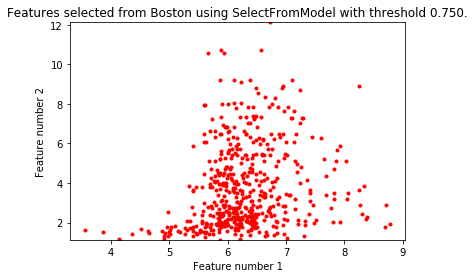

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
%matplotlib inline
# Load the boston dataset.
boston = load_boston()
X, y = boston.data, boston.target

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
# 使用LassoCV来规范化使之稀疏化
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
n_features = sfm.fit_transform(X,y).shape[1]  # 初始满足阈值后留下的特征

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
# 开始不断的进行阈值攀升，直到有特征不满足被砍掉
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1] 
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])  # ylim 设置y轴的范围
plt.show()

## 4.2 基于树模型的特征选择

In [27]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# 使用GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data,iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [30]:
# 使用随机森林进行特征选择
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
iris = load_iris()
X, y = iris.data, iris.target
X.shape
# (150, 4)
clf = RandomForestClassifier()
clf = clf.fit(X, y)
print(clf.feature_importances_)   # 显示每一个特征的重要性指标，越大说明越重要，可以看出，第三第四两个特征比较重要
# [ 0.04505659  0.01056346  0.45428591  0.49009404]
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

[0.11405403 0.04219061 0.29719246 0.54656289]


(150, 2)

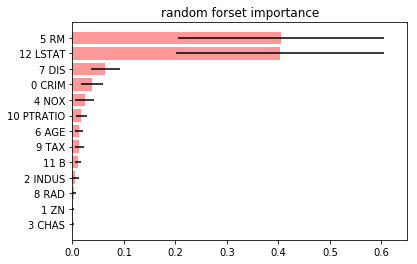

In [31]:
# 使用feature_importances_对boston数据的特征进行排序
from sklearn.ensemble import RandomForestRegressor
x, y = boston.data, boston.target
feature_name = np.array(["%d %s"%(b,a) for a,b in zip(boston.feature_names,range(len(boston.feature_names)))])
rf = RandomForestRegressor(n_estimators=100, random_state=101).fit(x,y)
importance = np.mean([tree.feature_importances_ for tree in rf.estimators_], axis=0)
std = np.std([ tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("random forset importance")
plt.barh(range_, importance[indices],color='r',xerr=std[indices],alpha=0.4,align='center')
plt.yticks(range(len(importance)),feature_name[indices])
plt.ylim([-1,len(importance)])
plt.xlim([0.0,0.65])
plt.show()